# **Inteligencia Artificial: Evaluación 3**

## **Hecho por:**
* David Daniel Henriquez Leal
* Santiago Andres Mercado Barandica

## **Preprocesamiento de los Datasets**

Este código preprocesa y balancea los datasets Digits y Abalone, generando un conjunto de datos listo para la implementación de modelos de clasificación.

**Procesamiento del Dataset de Digits**

* Se carga el dataset Digits de scikit-learn, transformándolo en un DataFrame que incluye las características de cada píxel (X) y la etiqueta correspondiente al dígito (y).

* Se utiliza SMOTE (Synthetic Minority Over-sampling Technique) para balancear las clases del dataset y asegurar una representación equitativa de cada dígito en el conjunto de datos.

* Los datos balanceados se guardan en un nuevo DataFrame para facilitar su análisis en los modelos posteriores.


**Procesamiento del Dataset de Abalone**

Para el dataset Abalone, el procesamiento incluye:

* Conversión de la columna Sex en valores numéricos (M: 0, F: 1, I: 2).
* La columna Rings se convierte en categorica, agrupando los valores entre 1 y 3 en la categoría "1-3" y los mayores de 20 en ">20". Los valores restantes se mantienen sin cambios.
* Se aplica SMOTE para balancear las categorías generadas en
Rings, permitiendo un análisis balanceado de las clases.

Con estos preprocesamientos, ambos datasets están listos para ser utilizados en la construcción de los modelos pedidos por el taller.

### **Pre-procesamiento Dataset de Digits**

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from imblearn.over_sampling import SMOTE

# Cargar el dataset de Digits
digits = load_digits()
df_digits = pd.DataFrame(digits.data, columns=[f'Pixel {i}' for i in range(digits.data.shape[1])])
df_digits['Digit'] = digits.target

# Separar características (X) y etiquetas (y)
X = df_digits.drop('Digit', axis=1)
y = df_digits['Digit']

# Aplicar SMOTE para balancear los datos
smote = SMOTE(random_state=42)  # Establece random_state para reproducibilidad
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos balanceados
df_digits = pd.DataFrame(X_resampled, columns=X.columns)
df_digits['Digit'] = y_resampled

# Mostrar el DataFrame balanceado
display(df_digits.head(10))

# Verificar el conteo de clases en el conjunto de datos balanceado
print(df_digits['Digit'].value_counts())


,Pixel 0,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 55,Pixel 56,Pixel 57,Pixel 58,Pixel 59,Pixel 60,Pixel 61,Pixel 62,Pixel 63,Digit
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


Digit
0    183
1    183
2    183
3    183
4    183
5    183
6    183
7    183
8    183
9    183
Name: count, dtype: int64


In [2]:
X_digits = df_digits.drop('Digit', axis=1)
y_digits = df_digits['Digit']


### **Pre-procesamiento Dataset de Abalone**

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from imblearn.over_sampling import SMOTE

# Cargar el dataset de abalone

df_abalone = fetch_openml(name="abalone", as_frame=True, version=1).frame
df_abalone.rename(columns={'Class_number_of_rings': 'Rings'}, inplace=True)

# Crea un nuevo valor categorico en la categoria de Rings que agrupe los valores de 1 al 3 y los mayores de 20

# Asegurar que 'Rings' es de tipo numérico
df_abalone['Rings'] = df_abalone['Rings'].astype(int)

# Crear una nueva columna categórica basada en los valores de 'Rings'
df_abalone['Rings'] = np.where(
    df_abalone['Rings'].between(1, 3), '1-3',
    np.where(df_abalone['Rings'] > 20, '>20', df_abalone['Rings'])
)

df_abalone['Rings'] = df_abalone['Rings'].astype('category')

# Comvertir la columna Sex en numerico
df_abalone['Sex'] = df_abalone['Sex'].map({'M': 0, 'F': 1, 'I': 2})

# Separar características (X) y etiquetas (y)
X = df_abalone.drop('Rings', axis=1)
y = df_abalone['Rings']

# Aplicar SMOTE para balancear los datos
smote = SMOTE(random_state=42)  # Establece random_state para reproducibilidad
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos balanceados
df_abalone = pd.DataFrame(X_resampled, columns=X.columns)
df_abalone['Rings'] = y_resampled

# Mostrar el DataFrame balanceado
display(df_abalone.head(10))

# Verificar el conteo de clases en el conjunto de datos balanceado
print(df_abalone['Rings'].value_counts())


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,1,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,0,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,1,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


Rings
1-3    689
19     689
9      689
8      689
7      689
6      689
5      689
4      689
20     689
18     689
10     689
17     689
16     689
15     689
14     689
13     689
12     689
11     689
>20    689
Name: count, dtype: int64


In [4]:
X_abalone = df_abalone.drop('Rings', axis=1)
y_abalone = df_abalone['Rings']

X_abalone = X_abalone.dropna()
y_abalone = y_abalone[X_abalone.index]


## **Taller 1**

Este código implementa un modelo de clasificación basado en Random Forest para predecir las categorias del conjunto de datos Digits. Se prueban diferentes valores del parámetro n_estimators, que determina el número de árboles en el modelo, evaluando su desempeño mediante validación cruzada. Las metricas calculadas incluyen precisión, exactitud y sensibilidad, tanto en los conjuntos de entrenamiento como de prueba, y los resultados se promedian tras realizar tres iteraciones para garantizar consistencia.

Los resultados obtenidos se almacenan en un DataFrame para identificar el número óptimo de árboles que maximiza el desempeño del modelo, considerando principalmente la metrica de exactitud en el conjunto de prueba. Con este valor, se entrena un modelo final y se calcula la importancia de las variables, seleccionando las 16 más relevantes para evaluar un modelo reducido, comparando su desempeño con el modelo completo Finalmente, se genera una gráfica que ilustra cómo varían las métricas de desempeño según el número de árboles, permitiendo visualizar la relación entre la complejidad del modelo y su efectividad en la clasificación.

,n_estimators,test_accuracy,test_precision,test_recall,train_accuracy,train_precision,train_recall
0,50,0.94,0.94,0.94,1.00,1.00,1.00
1,75,0.94,0.94,0.94,1.00,1.00,1.00
2,100,0.94,0.95,0.94,1.00,1.00,1.00
3,125,0.94,0.94,0.94,1.00,1.00,1.00
4,150,0.94,0.94,0.94,1.00,1.00,1.00
5,175,0.94,0.94,0.94,1.00,1.00,1.00
6,200,0.94,0.94,0.94,1.00,1.00,1.00
7,25,0.92,0.92,0.92,1.00,1.00,1.00
8,10,0.90,0.90,0.90,1.00,1.00,1.00
9,5,0.85,0.86,0.85,0.99,0.99,0.99


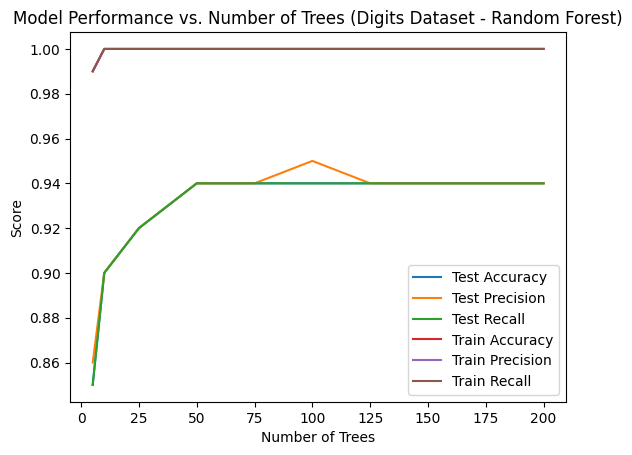


Mejor número de árboles: 50

Desempeño con todas las variables:
Test Accuracy: 0.94
Test Precision: 0.94
Test Recall: 0.94
Train Accuracy: 1.00
Train Precision: 1.00
Train Recall: 1.00

Desempeño con las 16 variables más importantes:
Test Accuracy: 0.91
Test Precision: 0.91
Test Recall: 0.91
Train Accuracy: 1.00
Train Precision: 1.00
Train Recall: 1.00


In [5]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Fijar semilla para asegurar la repetibilidad
np.random.seed(42)

# Cargar el Dataset de Digits
X, y = X_digits, y_digits

# Lista para almacenar resultados
results = []

# Probar con diferentes números de árboles para encontrar el óptimo sin sobreentrenamiento
n_estimators_range = [5, 10, 25, 50, 75, 100, 125, 150, 175, 200]
for n_estimators in n_estimators_range:
  train_accuracy, train_precision, train_recall, test_accuracy, test_precision, test_recall = 0, 0, 0, 0, 0, 0
  for i in range(3):
    # Crear el modelo Random Forest
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    # Validación cruzada con 3 conjuntos y cálculo de métricas (accuracy, precision y recall)
    scores = cross_validate(rf, X, y, cv=3, scoring=['accuracy', 'precision_macro', 'recall_macro'], return_train_score=True)
    train_accuracy += scores['train_accuracy'].mean()
    train_precision += scores['train_precision_macro'].mean()
    train_recall += scores['train_recall_macro'].mean()
    test_accuracy += scores['test_accuracy'].mean()
    test_precision += scores['test_precision_macro'].mean()
    test_recall += scores['test_recall_macro'].mean()

  # Almacenar los resultados
  results.append((n_estimators, round(test_accuracy/3, 2), round(test_precision/3, 2), round(test_recall/3, 2), round(train_accuracy/3, 2), round(train_precision/3, 2), round(train_recall/3, 2)))

# Convertir los resultados a un DataFrame para análisis
results_df = pd.DataFrame(results, columns=['n_estimators', 'test_accuracy', 'test_precision', 'test_recall', 'train_accuracy', 'train_precision', 'train_recall'])

# Ordenar el DataFrame por el test_accuracy
results_df.sort_values(by='test_accuracy', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
display(results_df)

# Mostrar el número de árboles que ofrece el mejor desempeño promedio
best_model_info = results_df.iloc[0]
best_n_estimators = best_model_info['n_estimators']

# Entrenar el modelo con el mejor número de árboles
rf_best = RandomForestClassifier(n_estimators=int(best_n_estimators), random_state=42)
rf_best.fit(X, y)

# Resetear el DataFrame para las graficas
results_df.sort_values(by='n_estimators', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

# Graficar los resultados de la tabla
plt.figure
plt.plot(results_df['n_estimators'], results_df['test_accuracy'], linestyle='-', label='Test Accuracy')
plt.plot(results_df['n_estimators'], results_df['test_precision'], linestyle='-', label='Test Precision')
plt.plot(results_df['n_estimators'], results_df['test_recall'], linestyle='-', label='Test Recall')
plt.plot(results_df['n_estimators'], results_df['train_accuracy'], linestyle='-', label='Train Accuracy')
plt.plot(results_df['n_estimators'], results_df['train_precision'], linestyle='-', label='Train Precision')
plt.plot(results_df['n_estimators'], results_df['train_recall'], linestyle='-', label='Train Recall')
plt.legend()
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.title('Model Performance vs. Number of Trees (Digits Dataset - Random Forest)')
plt.show()

# Obtener importancia de las variables
feature_importances = rf_best.feature_importances_
important_features_indices = np.argsort(feature_importances)[::-1][:16]  # Seleccionar las 16 más importantes

# Crear un nuevo conjunto de datos con solo las 16 variables más importantes
X_important = X.iloc[:, important_features_indices]

# Validación cruzada con las 16 variables más importantes
scores = cross_validate(rf_best, X_important, y, cv=3, scoring=['accuracy', 'precision_macro', 'recall_macro'], return_train_score=True)
test_accuracy_reduced = scores['test_accuracy'].mean()
test_precision_reduced = scores['test_precision_macro'].mean()
test_recall_reduced = scores['test_recall_macro'].mean()
train_accuracy_reduced = scores['train_accuracy'].mean()
train_precision_reduced = scores['train_precision_macro'].mean()
train_recall_reduced = scores['train_recall_macro'].mean()

print(f"\nMejor número de árboles: {int(best_n_estimators)}")
print("\nDesempeño con todas las variables:")
print(f"Test Accuracy: {best_model_info['test_accuracy']:.2f}")
print(f"Test Precision: {best_model_info['test_precision']:.2f}")
print(f"Test Recall: {best_model_info['test_recall']:.2f}")
print(f"Train Accuracy: {best_model_info['train_accuracy']:.2f}")
print(f"Train Precision: {best_model_info['train_precision']:.2f}")
print(f"Train Recall: {best_model_info['train_recall']:.2f}")

print("\nDesempeño con las 16 variables más importantes:")
print(f"Test Accuracy: {test_accuracy_reduced:.2f}")
print(f"Test Precision: {test_precision_reduced:.2f}")
print(f"Test Recall: {test_recall_reduced:.2f}")
print(f"Train Accuracy: {train_accuracy_reduced:.2f}")
print(f"Train Precision: {train_precision_reduced:.2f}")
print(f"Train Recall: {train_recall_reduced:.2f}")


Para el dataset de Digits, el número óptimo de árboles en el Random Forest es 50, obteniendo una exactitud, precisión y sensibilidad de 0.94 en el conjunto de prueba. Aunque se incremente el número de árboles el desempeño se mantiene estable, lo que indica que aumentar la complejidad del modelo no aporta mejoras significativas en este caso.

Al reducir el modelo a las 16 características más importantes, se observa una ligera disminución en el rendimiento, con métricas de exactitud, precisión y sensibilidad de 0.91 en el conjunto de prueba. Esto sugiere que, aunque el modelo reducido sigue mostrando un buen desempeño, la eliminación de variables afecta levemente su capacidad predictiva. Sin embargo, esta reducción podría ser ventajosa en contextos donde se prioricen la eficiencia computacional o la simplicidad del modelo sobre una mínima pérdida de rendimiento.

## **Taller 2**


Este código implementa un modelo de clasificación basado en Random Forest para predecir las categorias del conjunto de datos Abalone. Se evalúa el rendimiento del modelo variando el número de árboles (n_estimators) mediante validación cruzada, calculando métricas como precisión, exactitud y sensibilidad, para los conjuntos de entrenamiento y de prueba. Cada configuración se evalúa tres veces para obtener resultados más consistentes, y los promedios se almacenan en un DataFrame para identificar el número de árboles que ofrece el mejor desempeño, considerando principalmente la metrica de exactitud en el conjunto de prueba.

Con el número óptimo de árboles, se entrena un modelo final y se calcula la importancia de las características. Luego, se seleccionan las 4 características más relevantes para crear un modelo reducido. Se compara el desempeño del modelo completo y el modelo reducido para analizar el impacto de la reducción de variables en las métricas de rendimiento. Además, se genera una gráfica que muestra la relación entre el número de árboles y el desempeño del modelo en términos de precisión, exactitud y sensibilidad, tanto en los conjuntos de entrenamiento como de prueba.

,n_estimators,test_accuracy,test_precision,test_recall,train_accuracy,train_precision,train_recall
0,75,0.73,0.72,0.73,1.00,1.00,1.00
1,100,0.73,0.72,0.73,1.00,1.00,1.00
2,125,0.73,0.72,0.73,1.00,1.00,1.00
3,150,0.73,0.72,0.73,1.00,1.00,1.00
4,175,0.73,0.72,0.73,1.00,1.00,1.00
5,200,0.73,0.72,0.73,1.00,1.00,1.00
6,50,0.72,0.71,0.73,1.00,1.00,1.00
7,25,0.71,0.70,0.71,1.00,1.00,1.00
8,10,0.67,0.67,0.68,0.99,0.99,0.99
9,5,0.62,0.63,0.62,0.97,0.97,0.97


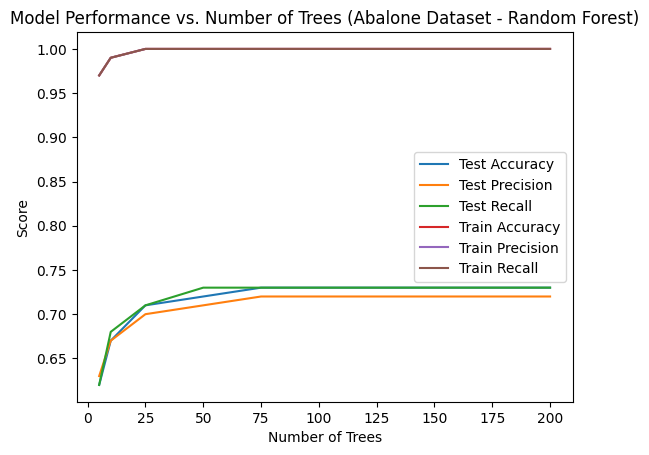


Mejor número de árboles: 75

Desempeño con todas las variables:
Test Accuracy: 0.73
Test Precision: 0.72
Test Recall: 0.73
Train Accuracy: 1.00
Train Precision: 1.00
Train Recall: 1.00

Desempeño con las 4 variables más importantes:
Test Accuracy: 0.60
Test Precision: 0.59
Test Recall: 0.61
Train Accuracy: 1.00
Train Precision: 1.00
Train Recall: 1.00


In [6]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Fijar semilla para asegurar la repetibilidad
np.random.seed(42)

# Cargar el Dataset de Abalone
X, y = X_abalone, y_abalone

# Lista para almacenar resultados
results = []

# Probar con diferentes números de árboles para encontrar el óptimo sin sobreentrenamiento
n_estimators_range = [5, 10, 25, 50, 75, 100, 125, 150, 175, 200]
for n_estimators in n_estimators_range:
    train_accuracy, train_precision, train_recall, test_accuracy, test_precision, test_recall = 0, 0, 0, 0, 0, 0
    for i in range(3):  # Realizar 3 iteraciones para promediar resultados
        # Crear el modelo Random Forest
        rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

        # Validación cruzada con 3 conjuntos y cálculo de métricas
        scores = cross_validate(rf, X, y, cv=3, scoring=['accuracy', 'precision_macro', 'recall_macro'], return_train_score=True)
        train_accuracy += scores['train_accuracy'].mean()
        train_precision += scores['train_precision_macro'].mean()
        train_recall += scores['train_recall_macro'].mean()
        test_accuracy += scores['test_accuracy'].mean()
        test_precision += scores['test_precision_macro'].mean()
        test_recall += scores['test_recall_macro'].mean()

    # Almacenar los resultados
    results.append((n_estimators, round(test_accuracy / 3, 2), round(test_precision / 3, 2), round(test_recall / 3, 2), round(train_accuracy / 3, 2), round(train_precision / 3, 2), round(train_recall / 3, 2)))

# Convertir los resultados a un DataFrame para análisis
results_df = pd.DataFrame(results, columns=['n_estimators', 'test_accuracy', 'test_precision', 'test_recall', 'train_accuracy', 'train_precision', 'train_recall'])

# Ordenar el DataFrame por el test_accuracy
results_df.sort_values(by='test_accuracy', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
display(results_df)

# Mostrar el número de árboles que ofrece el mejor desempeño promedio
best_model_info = results_df.iloc[0]
best_n_estimators = best_model_info['n_estimators']

# Entrenar el modelo con el mejor número de árboles
rf_best = RandomForestClassifier(n_estimators=int(best_n_estimators), random_state=42)
rf_best.fit(X, y)

# Resetear el DataFrame para las graficas
results_df.sort_values(by='n_estimators', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

# Graficar los resultados
plt.figure()
plt.plot(results_df['n_estimators'], results_df['test_accuracy'], linestyle='-', label='Test Accuracy')
plt.plot(results_df['n_estimators'], results_df['test_precision'], linestyle='-', label='Test Precision')
plt.plot(results_df['n_estimators'], results_df['test_recall'], linestyle='-', label='Test Recall')
plt.plot(results_df['n_estimators'], results_df['train_accuracy'], linestyle='-', label='Train Accuracy')
plt.plot(results_df['n_estimators'], results_df['train_precision'], linestyle='-', label='Train Precision')
plt.plot(results_df['n_estimators'], results_df['train_recall'], linestyle='-', label='Train Recall')
plt.legend()
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.title('Model Performance vs. Number of Trees (Abalone Dataset - Random Forest)')
plt.show()

# Obtener importancia de las variables
feature_importances = rf_best.feature_importances_
important_features_indices = np.argsort(feature_importances)[::-1][:4]  # Seleccionar las 4 más importantes

# Crear un nuevo conjunto de datos con solo las 4 variables más importantes
X_important = X.iloc[:, important_features_indices]

# Validación cruzada con las 4 variables más importantes
scores = cross_validate(rf_best, X_important, y, cv=3, scoring=['accuracy', 'precision_macro', 'recall_macro'], return_train_score=True)
test_accuracy_reduced = scores['test_accuracy'].mean()
test_precision_reduced = scores['test_precision_macro'].mean()
test_recall_reduced = scores['test_recall_macro'].mean()
train_accuracy_reduced = scores['train_accuracy'].mean()
train_precision_reduced = scores['train_precision_macro'].mean()
train_recall_reduced = scores['train_recall_macro'].mean()

# Mostrar desempeño con todas las variables y las 4 más importantes

print(f"\nMejor número de árboles: {int(best_n_estimators)}")
print("\nDesempeño con todas las variables:")
print(f"Test Accuracy: {best_model_info['test_accuracy']:.2f}")
print(f"Test Precision: {best_model_info['test_precision']:.2f}")
print(f"Test Recall: {best_model_info['test_recall']:.2f}")
print(f"Train Accuracy: {best_model_info['train_accuracy']:.2f}")
print(f"Train Precision: {best_model_info['train_precision']:.2f}")
print(f"Train Recall: {best_model_info['train_recall']:.2f}")

print("\nDesempeño con las 4 variables más importantes:")
print(f"Test Accuracy: {test_accuracy_reduced:.2f}")
print(f"Test Precision: {test_precision_reduced:.2f}")
print(f"Test Recall: {test_recall_reduced:.2f}")
print(f"Train Accuracy: {train_accuracy_reduced:.2f}")
print(f"Train Precision: {train_precision_reduced:.2f}")
print(f"Train Recall: {train_recall_reduced:.2f}")


Para el dataset de Abalone, el número óptimo de árboles en el Random Forest es 75, con el cual se alcanza una exactitud de 0.73, una precisión de 0.72 y una sensibilidad de 0.73, en el conjunto de prueba. Incrementar el número de árboles más allá de este punto mantiene el desempeño estable, pero no genera mejoras significativas en las métricas.

Al reducir el modelo a solo las 4 características más importantes, se observa una disminución considerable en el rendimiento. La exactitud promedio cae a 0.60, la precisión a 0.59 y la sensibilidad a 0.61, en el conjunto de prueba. Esto sugiere que el modelo necesita la totalidad de las variables para un desempeño óptimo, y que una reducciòn a las caracteristicas principales afecta negativamente su capacidad para diferenciar correctamente las categorias del dataset.

## **Taller 3**


Este código implementa un modelo de clasificación utilizando el algoritmo de K-Nearest Neighbors (KNN) para predecir las categorías en los conjuntos de datos “Digits” y “Abalone”. El objetivo es determinar el valor óptimo de vecinos 𝑘 que maximice el rendimiento del modelo sin caer en sobreentrenamiento.

Para ambos datasets, se define un rango de valores para 𝑘 (del 1 al 20), evaluando el desempeño del modelo con cada valor mediante validación cruzada. Para asegurar la estabilidad de los resultados, se realizan tres iteraciones por cada 𝑘, promediando las métricas obtenidas. Las métricas consideradas son precisión, exactitud y sensibilidad, tanto para los conjuntos de entrenamiento como de prueba.

En cada iteración, los resultados se almacenan en un DataFrame, permitiendo analizar el impacto del número de vecinos en el rendimiento del modelo. Posteriormente, se identifica el valor de 𝑘 que produce el mejor desempeño ordenando el DataFrame por la métrica de exactitud en el conjunto de prueba.

Además, se generan gráficas que ilustran cómo varían las métricas de desempeño (exactitud, precisión y sensibilidad) en función del número de vecinos 𝑘, tanto para los datos de entrenamiento como para los de prueba. Estas gráficas permiten visualizar la relación entre 𝑘 y el rendimiento del modelo.

### **Dataset Digits**

,k,test_accuracy,test_precision,test_recall,train_accuracy,train_precision,train_recall
0,1,0.97,0.97,0.97,1.00,1.00,1.00
1,3,0.97,0.97,0.97,0.99,0.99,0.99
2,4,0.97,0.97,0.97,0.99,0.99,0.99
3,5,0.97,0.97,0.97,0.99,0.99,0.99
4,6,0.97,0.97,0.97,0.99,0.99,0.99
5,2,0.97,0.97,0.97,0.99,0.99,0.99
6,10,0.96,0.96,0.96,0.99,0.99,0.99
7,12,0.96,0.96,0.96,0.99,0.99,0.99
8,11,0.96,0.96,0.96,0.99,0.99,0.99
9,9,0.96,0.96,0.96,0.99,0.99,0.99


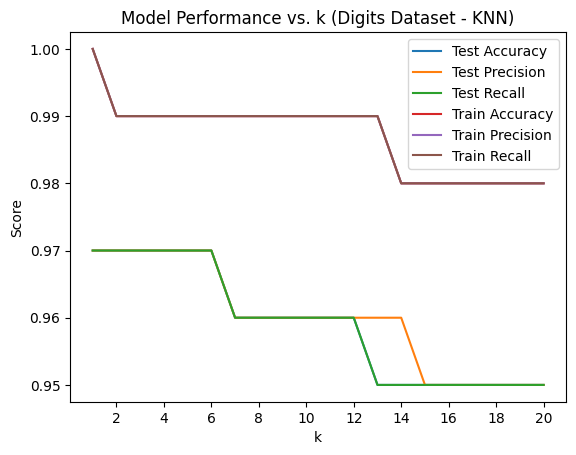


Mejor valor de k para el dataset Digits: 1

Desempeño con el mejor k:
Test Accuracy: 0.97
Test Precision: 0.97
Test Recall: 0.97
Train Accuracy: 1.00
Train Precision: 1.00
Train Recall: 1.00


In [7]:
# Importación de librerías
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Fijar semilla para asegurar la repetibilidad
np.random.seed(42)

# Lista para almacenar resultados para el dataset "Digits"
results_digits = []

# Carga y preparación del dataset "Digits"
X, y = X_digits, y_digits

# Probar con diferentes valores de k vecinos para encontrar el óptimo sin sobreentrenamiento
k_values = range(1, 21)
for k in k_values:
    train_accuracy, train_precision, train_recall, test_accuracy, test_precision, test_recall = 0, 0, 0, 0, 0, 0
    for i in range(3):  # Realizar 3 iteraciones para promediar resultados
        # Definir el modelo KNN
        knn = KNeighborsClassifier(n_neighbors=k)

        # Realizar validación cruzada
        scores = cross_validate(knn, X, y, cv=3, scoring=['accuracy', 'precision_macro', 'recall_macro'], return_train_score=True)
        train_accuracy += scores['train_accuracy'].mean()
        train_precision += scores['train_precision_macro'].mean()
        train_recall += scores['train_recall_macro'].mean()
        test_accuracy += scores['test_accuracy'].mean()
        test_precision += scores['test_precision_macro'].mean()
        test_recall += scores['test_recall_macro'].mean()

    # Almacenar los resultados
    results_digits.append((k, round(test_accuracy / 3, 2), round(test_precision / 3, 2), round(test_recall / 3, 2), round(train_accuracy / 3, 2), round(train_precision / 3, 2), round(train_recall / 3, 2)))

# Convertir los resultados a un DataFrame para análisis
results_digits_df = pd.DataFrame(results_digits, columns=['k', 'test_accuracy', 'test_precision', 'test_recall', 'train_accuracy', 'train_precision', 'train_recall'])

# Ordenar el DataFrame por test_accuracy
results_digits_df.sort_values(by='test_accuracy', ascending=False, inplace=True)
results_digits_df.reset_index(drop=True, inplace=True)
display(results_digits_df)

# Mostrar el valor de k que ofrece el mejor desempeño promedio para el dataset "Digits"
best_model_info_digits = results_digits_df.iloc[0]
best_k_digits = best_model_info_digits['k']

# Resetear el DataFrame para las graficas
results_digits_df.sort_values(by='k', ascending=False, inplace=True)
results_digits_df.reset_index(drop=True, inplace=True)

# Graficar los resultados
plt.figure()
plt.plot(results_digits_df['k'], results_digits_df['test_accuracy'], linestyle='-', label='Test Accuracy')
plt.plot(results_digits_df['k'], results_digits_df['test_precision'], linestyle='-', label='Test Precision')
plt.plot(results_digits_df['k'], results_digits_df['test_recall'], linestyle='-', label='Test Recall')
plt.plot(results_digits_df['k'], results_digits_df['train_accuracy'], linestyle='-', label='Train Accuracy')
plt.plot(results_digits_df['k'], results_digits_df['train_precision'], linestyle='-', label='Train Precision')
plt.plot(results_digits_df['k'], results_digits_df['train_recall'], linestyle='-', label='Train Recall')
plt.legend()
plt.xlabel('k')
plt.xticks(ticks=range(2, 21, 2))
plt.ylabel('Score')
plt.title('Model Performance vs. k (Digits Dataset - KNN)')
plt.show()

# Mostrar desempeño con el mejor valor de k
print(f"\nMejor valor de k para el dataset Digits: {int(best_k_digits)}")
print("\nDesempeño con el mejor k:")
print(f"Test Accuracy: {best_model_info_digits['test_accuracy']:.2f}")
print(f"Test Precision: {best_model_info_digits['test_precision']:.2f}")
print(f"Test Recall: {best_model_info_digits['test_recall']:.2f}")
print(f"Train Accuracy: {best_model_info_digits['train_accuracy']:.2f}")
print(f"Train Precision: {best_model_info_digits['train_precision']:.2f}")
print(f"Train Recall: {best_model_info_digits['train_recall']:.2f}")


Para el dataset de Digits el valor óptimo de 𝑘 es 1, logrando una exactitud, precisión y sensibilidad de 0.97 en el conjunto de prueba. Esto indica que el modelo KNN con un solo vecino captura efectivamente las características distintivas de los dígitos, alcanzando un alto rendimiento en la clasificación sin sobreentrenarse.

### **Dataset Abalone**

,k,test_accuracy,test_precision,test_recall,train_accuracy,train_precision,train_recall
0,1,0.75,0.73,0.75,1.00,1.00,1.00
1,2,0.69,0.69,0.69,0.86,0.88,0.86
2,3,0.67,0.66,0.67,0.82,0.83,0.82
3,4,0.65,0.63,0.65,0.78,0.78,0.79
4,5,0.63,0.61,0.64,0.75,0.74,0.76
5,6,0.62,0.59,0.62,0.72,0.71,0.73
6,7,0.60,0.58,0.61,0.70,0.69,0.71
7,8,0.59,0.57,0.60,0.68,0.67,0.69
8,9,0.58,0.56,0.59,0.67,0.66,0.67
9,11,0.57,0.54,0.57,0.64,0.63,0.65


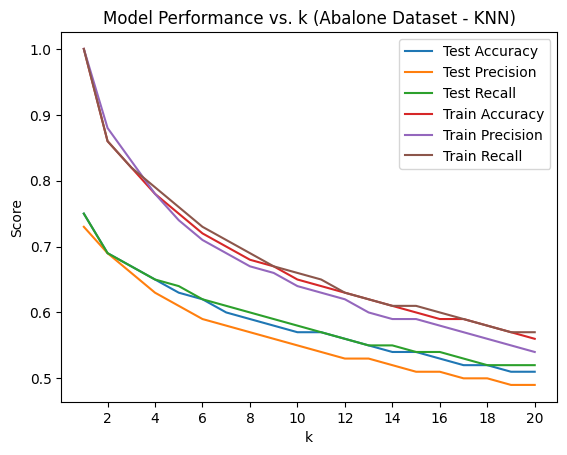


Mejor valor de k para el dataset Abalone: 1

Desempeño con el mejor k:
Test Accuracy: 0.75
Test Precision: 0.73
Test Recall: 0.75
Train Accuracy: 1.00
Train Precision: 1.00
Train Recall: 1.00


In [14]:
# Importación de librerías
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Fijar semilla para asegurar la repetibilidad
np.random.seed(42)

# Lista para almacenar resultados para el dataset "Abalone"
results_abalone = []

# Carga y preparación del dataset "Abalone"
X, y = X_abalone, y_abalone

# Probar con diferentes valores de k vecinos para encontrar el óptimo sin sobreentrenamiento
k_values = range(1, 21)
for k in k_values:
    train_accuracy, train_precision, train_recall, test_accuracy, test_precision, test_recall = 0, 0, 0, 0, 0, 0
    for i in range(3):  # Realizar 3 iteraciones para promediar resultados
        # Definir el modelo KNN
        knn = KNeighborsClassifier(n_neighbors=k)

        # Realizar validación cruzada
        scores = cross_validate(knn, X, y, cv=3, scoring=['accuracy', 'precision_macro', 'recall_macro'], return_train_score=True)
        train_accuracy += scores['train_accuracy'].mean()
        train_precision += scores['train_precision_macro'].mean()
        train_recall += scores['train_recall_macro'].mean()
        test_accuracy += scores['test_accuracy'].mean()
        test_precision += scores['test_precision_macro'].mean()
        test_recall += scores['test_recall_macro'].mean()

    # Almacenar los resultados
    results_abalone.append((k, round(test_accuracy / 3, 2), round(test_precision / 3, 2), round(test_recall / 3, 2), round(train_accuracy / 3, 2), round(train_precision / 3, 2), round(train_recall / 3, 2)))

# Convertir los resultados a un DataFrame para análisis
results_abalone_df = pd.DataFrame(results_abalone, columns=['k', 'test_accuracy', 'test_precision', 'test_recall', 'train_accuracy', 'train_precision', 'train_recall'])

# Ordenar el DataFrame por test_accuracy
results_abalone_df.sort_values(by='test_accuracy', ascending=False, inplace=True)
results_abalone_df.reset_index(drop=True, inplace=True)
display(results_abalone_df)

# Mostrar el valor de k que ofrece el mejor desempeño promedio para el dataset "Abalone"
best_model_info_abalone = results_abalone_df.iloc[0]
best_k_abalone = best_model_info_abalone['k']

# Resetear el DataFrame para las graficas
results_abalone_df.sort_values(by='k', ascending=False, inplace=True)
results_abalone_df.reset_index(drop=True, inplace=True)

# Graficar los resultados
plt.figure()
plt.plot(results_abalone_df['k'], results_abalone_df['test_accuracy'], linestyle='-', label='Test Accuracy')
plt.plot(results_abalone_df['k'], results_abalone_df['test_precision'], linestyle='-', label='Test Precision')
plt.plot(results_abalone_df['k'], results_abalone_df['test_recall'], linestyle='-', label='Test Recall')
plt.plot(results_abalone_df['k'], results_abalone_df['train_accuracy'], linestyle='-', label='Train Accuracy')
plt.plot(results_abalone_df['k'], results_abalone_df['train_precision'], linestyle='-', label='Train Precision')
plt.plot(results_abalone_df['k'], results_abalone_df['train_recall'], linestyle='-', label='Train Recall')
plt.legend()
plt.xlabel('k')
plt.xticks(ticks=range(2, 21, 2))
plt.ylabel('Score')
plt.title('Model Performance vs. k (Abalone Dataset - KNN)')
plt.show()

# Mostrar desempeño con el mejor valor de k
print(f"\nMejor valor de k para el dataset Abalone: {int(best_k_abalone)}")
print("\nDesempeño con el mejor k:")
print(f"Test Accuracy: {best_model_info_abalone['test_accuracy']:.2f}")
print(f"Test Precision: {best_model_info_abalone['test_precision']:.2f}")
print(f"Test Recall: {best_model_info_abalone['test_recall']:.2f}")
print(f"Train Accuracy: {best_model_info_abalone['train_accuracy']:.2f}")
print(f"Train Precision: {best_model_info_abalone['train_precision']:.2f}")
print(f"Train Recall: {best_model_info_abalone['train_recall']:.2f}")


Para el dataset de Abalone, el mejor valor de 𝑘 es 1, alcanzando una exactitud de 0.75, una precisión de 0.73 y una sensibilidad de 0.75 en el conjunto de prueba. Este resultado sugiere que el modelo KNN con un solo vecino es el más efectivo para clasificar los datos, logrando capturar las características principales. Sin embargo, en contraste con el dataset de Digits, el desempeño del modelo disminuye rápidamente a medida que 𝑘 aumenta, reflejando la complejidad y variabilidad de este dataset, lo que dificulta la clasificación precisa cuando se consideran múltiples vecinos.

## **Taller 4**

Este código implementa un modelo de clasificación utilizando el algoritmo Radius Neighbors Classifier (RNN) para los conjuntos de datos "Digits" y "Abalone". Se utiliza el escalador StandardScaler para normalizar las variables numéricas, garantizando que tengan media cero y desviación estándar unitaria. Esto mejora el desempeño del modelo al reducir el impacto de las diferencias de escala entre las variables.

El enfoque se centra en evaluar diferentes valores para el parámetro de radius, que define el radio de influencia para incluir vecinos dentro de la clasificación. Para cada valor de radio, se realizan múltiples iteraciones con validación cruzada, calculando métricas clave como exactitud, precisión y sensibilidad, tanto en los datos de entrenamiento como en los de prueba. Los resultados se promedian para minimizar la variabilidad y detectar tendencias claras.

Los resultados de las métricas se almacenan en un DataFrame para análisis posterior, lo que facilita identificar el radio que ofrece el modelo con mayor desempeño, considerando principalmente la métrica de exactitud en el conjunto de prueba. Finalmente, se generan gráficos que muestran cómo varían las métricas en función del radio, proporcionando una visualización clara de la relación entre el radio y el rendimiento del modelo.

### **Dataset Digits**

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_digits = scaler.fit_transform(X_digits)


,radius,test_accuracy,test_precision,test_recall,train_accuracy,train_precision,train_recall
0,6.5,0.90,0.91,0.90,0.96,0.97,0.96
1,6.0,0.89,0.92,0.89,0.98,0.98,0.98
2,7.0,0.89,0.90,0.89,0.94,0.94,0.94
3,5.5,0.87,0.91,0.87,0.98,0.99,0.98
4,7.5,0.87,0.88,0.87,0.92,0.92,0.92
5,8.0,0.82,0.84,0.82,0.88,0.89,0.88
6,5.0,0.81,0.92,0.81,0.99,0.99,0.99
7,4.5,0.70,0.92,0.70,0.99,0.99,0.99
8,4.0,0.55,0.91,0.55,1.00,1.00,1.00


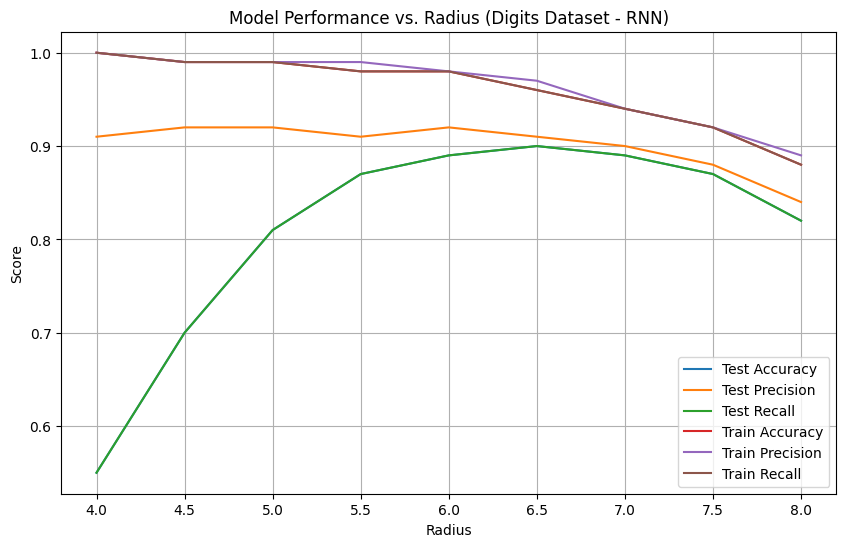


Mejor valor de Radio para el dataset Digits: 6.5

Desempeño con el mejor radio:
Test Accuracy: 0.90
Test Precision: 0.91
Test Recall: 0.90
Train Accuracy: 0.96
Train Precision: 0.97
Train Recall: 0.96


In [10]:
# Importación de librerías
import numpy as np
import pandas as pd
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Fijar semilla para asegurar la repetibilidad
np.random.seed(42)

# Lista para almacenar resultados para el dataset "Digits"
results_digits = []

# Carga y preparación del dataset "Digits"
X, y = X_digits, y_digits

# Rango de valores de radio a probar
radius_values = [4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8]

# Probar con diferentes radios para encontrar el óptimo sin sobreentrenamiento
for radius in radius_values:
    train_accuracy, train_precision, train_recall, test_accuracy, test_precision, test_recall = 0, 0, 0, 0, 0, 0
    for i in range(3):  # Realizar 3 iteraciones para promediar resultados
        # Definir el modelo Radius Neighbors Classifier
        rnn = RadiusNeighborsClassifier(radius=radius, outlier_label='most_frequent')

        # Realizar validación cruzada
        scores = cross_validate(rnn, X, y, cv=3, scoring=['accuracy', 'precision_macro', 'recall_macro'], return_train_score=True)
        train_accuracy += scores['train_accuracy'].mean()
        train_precision += scores['train_precision_macro'].mean()
        train_recall += scores['train_recall_macro'].mean()
        test_accuracy += scores['test_accuracy'].mean()
        test_precision += scores['test_precision_macro'].mean()
        test_recall += scores['test_recall_macro'].mean()

    # Almacenar los resultados promediados
    results_digits.append((radius, round(test_accuracy / 3, 2), round(test_precision / 3, 2), round(test_recall / 3, 2), round(train_accuracy / 3, 2), round(train_precision / 3, 2), round(train_recall / 3, 2)))

# Convertir los resultados a un DataFrame para análisis
results_digits_df = pd.DataFrame(results_digits, columns=['radius', 'test_accuracy', 'test_precision', 'test_recall', 'train_accuracy', 'train_precision', 'train_recall'])

# Ordenar el DataFrame por test_accuracy
results_digits_df.sort_values(by='test_accuracy', ascending=False, inplace=True)
results_digits_df.reset_index(drop=True, inplace=True)
display(results_digits_df)

# Mostrar el radio que ofrece el mejor desempeño promedio para el dataset "Digits"
best_model_info_digits = results_digits_df.iloc[0]
best_radius_digits = best_model_info_digits['radius']

# Resetear el DataFrame para graficar
results_digits_df.sort_values(by='radius', ascending=True, inplace=True)
results_digits_df.reset_index(drop=True, inplace=True)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(results_digits_df['radius'], results_digits_df['test_accuracy'], linestyle='-', label='Test Accuracy')
plt.plot(results_digits_df['radius'], results_digits_df['test_precision'], linestyle='-', label='Test Precision')
plt.plot(results_digits_df['radius'], results_digits_df['test_recall'], linestyle='-', label='Test Recall')
plt.plot(results_digits_df['radius'], results_digits_df['train_accuracy'], linestyle='-', label='Train Accuracy')
plt.plot(results_digits_df['radius'], results_digits_df['train_precision'], linestyle='-', label='Train Precision')
plt.plot(results_digits_df['radius'], results_digits_df['train_recall'], linestyle='-', label='Train Recall')
plt.legend()
plt.xlabel('Radius')
plt.xticks(ticks=radius_values)
plt.ylabel('Score')
plt.title('Model Performance vs. Radius (Digits Dataset - RNN)')
plt.grid(True)
plt.show()

# Mostrar desempeño con el mejor valor de radio
print(f"\nMejor valor de Radio para el dataset Digits: {best_radius_digits:.1f}")
print("\nDesempeño con el mejor radio:")
print(f"Test Accuracy: {best_model_info_digits['test_accuracy']:.2f}")
print(f"Test Precision: {best_model_info_digits['test_precision']:.2f}")
print(f"Test Recall: {best_model_info_digits['test_recall']:.2f}")
print(f"Train Accuracy: {best_model_info_digits['train_accuracy']:.2f}")
print(f"Train Precision: {best_model_info_digits['train_precision']:.2f}")
print(f"Train Recall: {best_model_info_digits['train_recall']:.2f}")


Para el dataset de Digits, el radio óptimo para el modelo RNN es 6.5, con una exactitud de 0.90, precisión de 0.91 y sensibilidad de 0.90 en el conjunto de prueba. Este valor de radio permite capturar efectivamente la proximidad entre puntos relevantes, logrando un balance adecuado entre la generalización y la reducción de ruido.

### **Dataset Abalone**

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_abalone = scaler.fit_transform(X_abalone)


,radius,test_accuracy,test_precision,test_recall,train_accuracy,train_precision,train_recall
0,0.20,0.60,0.65,0.60,0.81,0.81,0.81
1,0.15,0.59,0.73,0.59,0.88,0.89,0.88
2,0.25,0.58,0.59,0.58,0.73,0.73,0.73
3,0.30,0.55,0.54,0.55,0.65,0.66,0.66
4,0.10,0.54,0.82,0.54,0.95,0.95,0.95
5,0.35,0.51,0.50,0.51,0.59,0.59,0.59
6,0.40,0.47,0.46,0.48,0.53,0.53,0.53
7,0.45,0.44,0.43,0.44,0.48,0.49,0.49
8,0.50,0.41,0.41,0.42,0.45,0.45,0.45


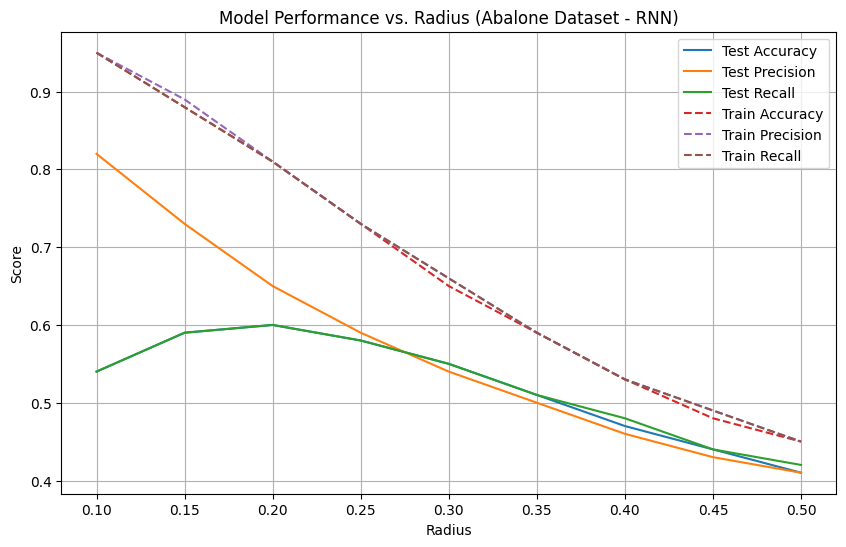


Mejor valor de Radio para el dataset Abalone: 0.20

Desempeño con el mejor radio:
Test Accuracy: 0.60
Test Precision: 0.65
Test Recall: 0.60
Train Accuracy: 0.81
Train Precision: 0.81
Train Recall: 0.81


In [12]:
# Importación de librerías
import numpy as np
import pandas as pd
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Fijar semilla para asegurar la repetibilidad
np.random.seed(42)

# Lista para almacenar resultados para el dataset "Abalone"
results_abalone = []

# Carga y preparación del dataset "Abalone"
X, y = X_abalone, y_abalone

# Rango de valores de radio a probar
radius_values = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

# Probar con diferentes radios para encontrar el óptimo sin sobreentrenamiento
for radius in radius_values:
    train_accuracy, train_precision, train_recall, test_accuracy, test_precision, test_recall = 0, 0, 0, 0, 0, 0
    for i in range(3):  # Realizar 3 iteraciones para promediar resultados
        # Definir el modelo Radius Neighbors Classifier
        rnn = RadiusNeighborsClassifier(radius=radius, outlier_label='most_frequent')

        # Realizar validación cruzada
        scores = cross_validate(rnn, X, y, cv=3, scoring=['accuracy', 'precision_macro', 'recall_macro'], return_train_score=True)
        train_accuracy += scores['train_accuracy'].mean()
        train_precision += scores['train_precision_macro'].mean()
        train_recall += scores['train_recall_macro'].mean()
        test_accuracy += scores['test_accuracy'].mean()
        test_precision += scores['test_precision_macro'].mean()
        test_recall += scores['test_recall_macro'].mean()

    # Almacenar los resultados promediados
    results_abalone.append((radius, round(test_accuracy / 3, 2), round(test_precision / 3, 2), round(test_recall / 3, 2), round(train_accuracy / 3, 2), round(train_precision / 3, 2), round(train_recall / 3, 2)))

# Convertir los resultados a un DataFrame para análisis
results_abalone_df = pd.DataFrame(results_abalone, columns=['radius', 'test_accuracy', 'test_precision', 'test_recall', 'train_accuracy', 'train_precision', 'train_recall'])

# Ordenar el DataFrame por test_accuracy
results_abalone_df.sort_values(by='test_accuracy', ascending=False, inplace=True)
results_abalone_df.reset_index(drop=True, inplace=True)
display(results_abalone_df)

# Mostrar el radio que ofrece el mejor desempeño promedio para el dataset "Abalone"
best_model_info_abalone = results_abalone_df.iloc[0]
best_radius_abalone = best_model_info_abalone['radius']

# Resetear el DataFrame para graficar
results_abalone_df.sort_values(by='radius', ascending=True, inplace=True)
results_abalone_df.reset_index(drop=True, inplace=True)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(results_abalone_df['radius'], results_abalone_df['test_accuracy'], linestyle='-', label='Test Accuracy')
plt.plot(results_abalone_df['radius'], results_abalone_df['test_precision'], linestyle='-', label='Test Precision')
plt.plot(results_abalone_df['radius'], results_abalone_df['test_recall'], linestyle='-', label='Test Recall')
plt.plot(results_abalone_df['radius'], results_abalone_df['train_accuracy'], linestyle='--', label='Train Accuracy')
plt.plot(results_abalone_df['radius'], results_abalone_df['train_precision'], linestyle='--', label='Train Precision')
plt.plot(results_abalone_df['radius'], results_abalone_df['train_recall'], linestyle='--', label='Train Recall')
plt.legend()
plt.xlabel('Radius')
plt.xticks(ticks=radius_values)
plt.ylabel('Score')
plt.title('Model Performance vs. Radius (Abalone Dataset - RNN)')
plt.grid(True)
plt.show()

# Mostrar desempeño con el mejor valor de radio
print(f"\nMejor valor de Radio para el dataset Abalone: {best_radius_abalone:.2f}")
print("\nDesempeño con el mejor radio:")
print(f"Test Accuracy: {best_model_info_abalone['test_accuracy']:.2f}")
print(f"Test Precision: {best_model_info_abalone['test_precision']:.2f}")
print(f"Test Recall: {best_model_info_abalone['test_recall']:.2f}")
print(f"Train Accuracy: {best_model_info_abalone['train_accuracy']:.2f}")
print(f"Train Precision: {best_model_info_abalone['train_precision']:.2f}")
print(f"Train Recall: {best_model_info_abalone['train_recall']:.2f}")


En el caso del dataset de Abalone, el mejor radio encontrado es 0.20, alcanzando una exactitud de 0.60, precisión de 0.65 y sensibilidad de 0.60 en el conjunto de pruebas. A medida que el radio se incrementa, el desempeño del modelo disminuye significativamente, lo que sugiere que un radio pequeño es crucial para manejar de manera efectiva la complejidad y la variabilidad presente en los datos del dataset de Abalone.

## **Taller 5**

### **Random Forest**:
Al aplicar Random Forest en los datasets de Digits y Abalone, el modelo demostró ser menos sensible a los desequilibrios iniciales de las categorias. Sin realizar balanceo o escalado, los resultados fueron consistentes y estables, especialmente en el dataset Digits, donde la estructura de las categorias es relativamente más diferenciada. Sin embargo, en Abalone, aunque el desempeño de Random Forest fue aceptable, las características complejas y menos distintivas del dataset no permitieron que el modelo alcanzara una precisión tan alta como en Digits. Esto indica que en datos menos estructurados, si bien Random Forest sigue siendo una buena opción, podría beneficiarse de un preprocesamiento adicional para optimizar los resultados.

### **K-Nearest Neighbors (KNN):**
KNN mostró una fuerte dependencia de un balanceo adecuado en los datos, especialmente en el dataset Abalone, donde las categorias estaban inicialmente desequilibradas. La técnica SMOTE fue fundamental en este caso para mejorar la representatividad de todas las categorias, permitiendo que KNN identificara patrones con mayor precisión. Este balanceo fue menos crítico en Digits, ya que este dataset tiene una estructura de categorias mejor definida, pero el balanceo sigue siendo beneficioso para que el modelo no se incline hacia categorias dominantes.

###**Radius Neighbors Classifier (RNN):**
En el caso del RNN, aplicar un StandardScaler fue esencial para obtener resultados aceptables, sobre todo en Abalone, que contiene datos con un rango amplio y valores atípicos significativos. Este escalado ayudó a estabilizar el efecto de puntos extremos en el cálculo de las vecindades, permitiendo una clasificación más precisa en ambos Datasets. RNN fue efectivo en Digits, donde las características numéricas ya tienen una estructura clara, pero en Abalone, la combinación de escalado y radio optimizado ayudó a mitigar la dispersión y heterogeneidad del dataset, logrando una mejor clasificación sin caer en sobreajuste. Esto demuestra que, para el RNN, un escalado estandar de las características es determinante en datos más complejos como los del Dataset de Abalone.

## **Referencias:**

* https://librosa.org/doc/latest/index.html

* https://pandas.pydata.org/docs/

* https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

* https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_digits.html

* https://www.openml.org/search?type=data&sort=version&status=any&order=asc&exact_name=abalone&id=183

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

* https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.cross_validate.html

* https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

* https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html